In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42

%matplotlib inline

In [2]:
df=pd.read_csv('FY12-17.csv')

In [3]:
df.head()

,date,Employer,victims,Description,Fatality,inspection
0,04/28/2017,"PROWLER RECOVERY, INC., 8100 W. Broward Blvd. ...",Francisco Canjura,A worker died after being caught between two v...,Fatality,1229035
1,04/27/2017,"Lydick Hooks Roofing Company, 1741 S. 14th ABI...",Ismael Mendosa,Worker fatally injured in fall from roof.,Fatality,1227895
2,04/27/2017,"MHP Real Estate Services, 180 Maiden Lane NEW ...",Robert Maresca,A worker died after falling from a 6 foot ladder.,Fatality,1228425
3,04/27/2017,"Randolph & Randolph, LLC, Logging site - near ...",John Townsend,Worker struck and killed by log.,Fatality,1228413
4,04/26/2017,"Brown's Tree Service & Landscaping LLC, 1830 H...",John Kelly Neal,Worker died after being struck by a front end ...,Fatality,1228040


In [15]:
df['month'] = df['date'].str.extract('^([0-9]{1,2})/[0-9]+/[0-9]{4}')

In [16]:
df.head()

,date,Employer,victims,Description,Fatality,inspection,month,year
0,04/28/2017,"PROWLER RECOVERY, INC., 8100 W. Broward Blvd. ...",Francisco Canjura,A worker died after being caught between two v...,Fatality,1229035,04,2017
1,04/27/2017,"Lydick Hooks Roofing Company, 1741 S. 14th ABI...",Ismael Mendosa,Worker fatally injured in fall from roof.,Fatality,1227895,04,2017
2,04/27/2017,"MHP Real Estate Services, 180 Maiden Lane NEW ...",Robert Maresca,A worker died after falling from a 6 foot ladder.,Fatality,1228425,04,2017
3,04/27/2017,"Randolph & Randolph, LLC, Logging site - near ...",John Townsend,Worker struck and killed by log.,Fatality,1228413,04,2017
4,04/26/2017,"Brown's Tree Service & Landscaping LLC, 1830 H...",John Kelly Neal,Worker died after being struck by a front end ...,Fatality,1228040,04,2017


In [25]:
df['year'] = df['date'].str.extract('^[0-9]{1,2}/[0-9]+/([0-9]{4}).*?')

In [18]:
df.head()

,date,Employer,victims,Description,Fatality,inspection,month,year
0,04/28/2017,"PROWLER RECOVERY, INC., 8100 W. Broward Blvd. ...",Francisco Canjura,A worker died after being caught between two v...,Fatality,1229035,04,2017
1,04/27/2017,"Lydick Hooks Roofing Company, 1741 S. 14th ABI...",Ismael Mendosa,Worker fatally injured in fall from roof.,Fatality,1227895,04,2017
2,04/27/2017,"MHP Real Estate Services, 180 Maiden Lane NEW ...",Robert Maresca,A worker died after falling from a 6 foot ladder.,Fatality,1228425,04,2017
3,04/27/2017,"Randolph & Randolph, LLC, Logging site - near ...",John Townsend,Worker struck and killed by log.,Fatality,1228413,04,2017
4,04/26/2017,"Brown's Tree Service & Landscaping LLC, 1830 H...",John Kelly Neal,Worker died after being struck by a front end ...,Fatality,1228040,04,2017


In [38]:
df.groupby('month')['month'].count()

month
01     523
02     423
03     498
04     600
05     488
06     527
07     590
08     578
09     588
10     622
11     564
12     478
nan      3
Name: month, dtype: int64

In [37]:
df['month'] = df['month'].astype(str).str.zfill(2)

In [26]:
df.groupby('year')['year'].count()

year
1995       1
2007       1
2011     314
2012    1022
2013    1204
2014    1365
2015    1162
2016    1115
2017     295
Name: year, dtype: int64

In [39]:
df.groupby('month')['month'].count().

month
01     523
02     423
03     498
04     600
05     488
06     527
07     590
08     578
09     588
10     622
11     564
12     478
nan      3
Name: month, dtype: int64

In [40]:
df['zipcode'] = df['Employer'].str.extract('\s([0-9]{5})')

In [41]:
df.head()

,date,Employer,victims,Description,Fatality,inspection,month,year,zipcode
0,04/28/2017,"PROWLER RECOVERY, INC., 8100 W. Broward Blvd. ...",Francisco Canjura,A worker died after being caught between two v...,Fatality,1229035,04,2017,33324
1,04/27/2017,"Lydick Hooks Roofing Company, 1741 S. 14th ABI...",Ismael Mendosa,Worker fatally injured in fall from roof.,Fatality,1227895,04,2017,79602
2,04/27/2017,"MHP Real Estate Services, 180 Maiden Lane NEW ...",Robert Maresca,A worker died after falling from a 6 foot ladder.,Fatality,1228425,04,2017,10038
3,04/27/2017,"Randolph & Randolph, LLC, Logging site - near ...",John Townsend,Worker struck and killed by log.,Fatality,1228413,04,2017,35244
4,04/26/2017,"Brown's Tree Service & Landscaping LLC, 1830 H...",John Kelly Neal,Worker died after being struck by a front end ...,Fatality,1228040,04,2017,45011


In [42]:
df['state'] = df['Employer'].str.extract('([A-Z]{2})\s[0-9]{5}')

In [43]:
df.head()

,date,Employer,victims,Description,Fatality,inspection,month,year,zipcode,state
0,04/28/2017,"PROWLER RECOVERY, INC., 8100 W. Broward Blvd. ...",Francisco Canjura,A worker died after being caught between two v...,Fatality,1229035,04,2017,33324,FL
1,04/27/2017,"Lydick Hooks Roofing Company, 1741 S. 14th ABI...",Ismael Mendosa,Worker fatally injured in fall from roof.,Fatality,1227895,04,2017,79602,TX
2,04/27/2017,"MHP Real Estate Services, 180 Maiden Lane NEW ...",Robert Maresca,A worker died after falling from a 6 foot ladder.,Fatality,1228425,04,2017,10038,NY
3,04/27/2017,"Randolph & Randolph, LLC, Logging site - near ...",John Townsend,Worker struck and killed by log.,Fatality,1228413,04,2017,35244,AL
4,04/26/2017,"Brown's Tree Service & Landscaping LLC, 1830 H...",John Kelly Neal,Worker died after being struck by a front end ...,Fatality,1228040,04,2017,45011,OH


In [44]:
df['company'] = df['Employer'].str.extract('(^.*?)\,')

In [45]:
df.head()

,date,Employer,victims,Description,Fatality,inspection,month,year,zipcode,state,company
0,04/28/2017,"PROWLER RECOVERY, INC., 8100 W. Broward Blvd. ...",Francisco Canjura,A worker died after being caught between two v...,Fatality,1229035,04,2017,33324,FL,PROWLER RECOVERY
1,04/27/2017,"Lydick Hooks Roofing Company, 1741 S. 14th ABI...",Ismael Mendosa,Worker fatally injured in fall from roof.,Fatality,1227895,04,2017,79602,TX,Lydick Hooks Roofing Company
2,04/27/2017,"MHP Real Estate Services, 180 Maiden Lane NEW ...",Robert Maresca,A worker died after falling from a 6 foot ladder.,Fatality,1228425,04,2017,10038,NY,MHP Real Estate Services
3,04/27/2017,"Randolph & Randolph, LLC, Logging site - near ...",John Townsend,Worker struck and killed by log.,Fatality,1228413,04,2017,35244,AL,Randolph & Randolph
4,04/26/2017,"Brown's Tree Service & Landscaping LLC, 1830 H...",John Kelly Neal,Worker died after being struck by a front end ...,Fatality,1228040,04,2017,45011,OH,Brown's Tree Service & Landscaping LLC


In [46]:
df.groupby('state')['state'].count()

state
AK     14
AL    116
AR     70
AS      3
AZ     58
CA    558
CO     84
CT     34
DC     10
DE     13
FL    418
GA    182
GU      3
HI     18
IA     95
ID     41
IL    265
IN    150
KS     67
KY    149
LA    136
LO      1
MA     72
MD     78
ME     23
MI    156
MN     97
MO    110
MP      2
MS     79
MT     21
NC    138
ND     70
NE     40
NH     10
NJ    162
NM     64
NV     57
NY    282
OH    238
OK    106
OR     47
PA    209
PR     33
RI     11
SC     40
SD     27
TN    151
TX    774
UT     56
VA     96
VI      1
VT     19
WA    164
WI    127
WV     73
WY     24
Name: state, dtype: int64

In [47]:
df.groupby('company')['company'].count()

company
"C" Schlicht Plumbing Inc.                                1
(Establishment name not provided)                         1
1 Detroit Metro Airport                                   1
111 East Reistville RoadLantz Family Farm                 1
120 85 LLC                                                1
12500 N. Santa Fe                                         1
128 Highland St. Berlin                                   1
133-25 131 St.                                            1
13838 Hays Rd American Mulch & Ground Cover               1
14 E. 60th St                                             1
14635 MOUNT AIRY ROAD                                     1
15 Black LLC                                              1
1633 Williams Road                                        1
1660 Lucas Road                                           1
1706 S. 68th St.                                          1
1856 Nolan SBander Inc.                                   1
188 Norcross Street RBP Construc

In [18]:
df.loc[df['company'] == '133-25 131 St.']

,date,Employer,victims,Description,Fatality,inspection,month,year,zipcode,state,company
4559,7/19/2013,"133-25 131 St., South Ozone Park, NY 11420",NaN,Employee died after falling from roof while co...,Fatality,NaN,NaN,NaN,11420,NY,133-25 131 St.


In [48]:
pd.set_option('display.max_colwidth', -1)

In [20]:
df.Employer

0       PROWLER RECOVERY, INC., 8100 W. Broward Blvd. PLANTATION  FL 33324                  
1       Lydick Hooks Roofing Company, 1741 S. 14th ABILENE  TX 79602                        
2       MHP Real Estate Services, 180 Maiden Lane NEW YORK  NY 10038                        
3       Randolph & Randolph, LLC, Logging site - near  Hoover Met HOOVER  AL 35244          
4       Brown's Tree Service & Landscaping LLC, 1830 Hamilton-Cleves Road HAMILTON  OH 45011
5       McGee Roofing LLC, 1198 Circle Drive TONGANOXIE  KS 66086                           
6       Coles Energy, 3619 E State Route 113 MILAN  OH 44846                                
7       DayStar Infrastructure & Constuction, Inc., 50 Maner Terrace SE SMYRNA  GA 30080    
8       EAM Harvesting, LLC, Section 6 Block 32 12101 Hwy 70 ARCADIA  FL 34266              
9       Mastec Services Company, Inc., 803 SE 10th Street CAPE CORAL  FL 33904              
10      Hobart Farms, Inc., Asotin, WA 99402-9610                     

In [21]:
df.loc[df['state'] == 'NY']

,date,Employer,victims,Description,Fatality,inspection,month,year,zipcode,state,company
2,04/27/2017,"MHP Real Estate Services, 180 Maiden Lane NEW YORK NY 10038",Robert Maresca,A worker died after falling from a 6 foot ladder.,Fatality,1228425,04,2017,10038,NY,MHP Real Estate Services
24,04/18/2017,"B & T Construction Inc., 140 N 6th Street LEWISTON NY 14092",Tim Zayack,Worker crushed between arial lift basket and roof.,Fatality,1225960,04,2017,14092,NY,B & T Construction Inc.
40,04/13/2017,"Jeff Decker & Son, Inc., 9 Hook Rd RHINEBECK NY 12572",Susan M. Coons,Worker died after being struck by bulldozer.,Fatality,1225205,04,2017,12572,NY,Jeff Decker & Son
42,04/13/2017,"Tino GC, Inc., 10 Pleasant Lane OYSTER BAY NY 11771",Marvin Orellano,Worker performing external brick work died in fall from scaffold.,Fatality,1225377,04,2017,11771,NY,Tino GC
47,04/12/2017,"M.T. Steel Fabricators Inc., 1604 Broadway Ave NEW YORK NY 10019",Jose Cruise,Worker died after falling 18 feet to the floor.,Fatality,1225359,04,2017,10019,NY,M.T. Steel Fabricators Inc.
53,04/10/2017,"Decorama Building & Plumbing Supply, Inc., 1233 Metropolitan Ave. BROOKLYN NY 11237",Hou Jun Li,Worker struck and killed by truck while loading materials.,Fatality,1224356,04,2017,11237,NY,Decorama Building & Plumbing Supply
110,03/22/2017,"Cascades New York Inc., 1845 Emerson Street ROCHESTER NY 14606",,Worker fatally crushed by 900 pound bale of material.,Fatality,1219047,03,2017,14606,NY,Cascades New York Inc.
118,03/17/2017,"Professional Aviation Marketing, Inc., Hardstand in Cargo Building 87 JAMAICA NY 11430",,Worker fatally injured in fall from aircraft.,Fatality,1218790,03,2017,11430,NY,Professional Aviation Marketing
128,03/15/2017,"Pescara Contracting Inc., 15 Grumman Rd. West BETHPAGE NY 11714",,Worker fatally injured in fall from scaffold.,Fatality,1219116,03,2017,11714,NY,Pescara Contracting Inc.
139,03/10/2017,"Staten Island Asphalt LLC, 356 Meridith Ave. STATEN ISLAND NY 10314",Antonio Veloso,Worker struck and killed by conveyor equipment.,Fatality,1216606,03,2017,10314,NY,Staten Island Asphalt LLC


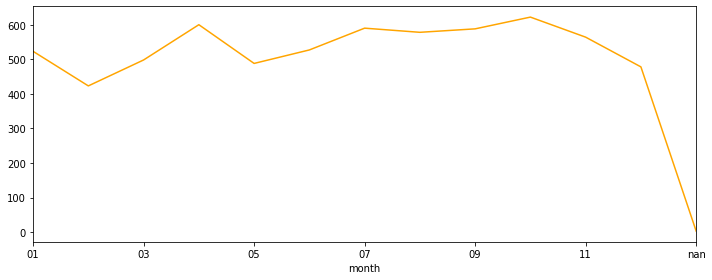

In [49]:
df.groupby('month')['month'].count().plot(figsize=(10,4),color='orange')

plt.tight_layout()

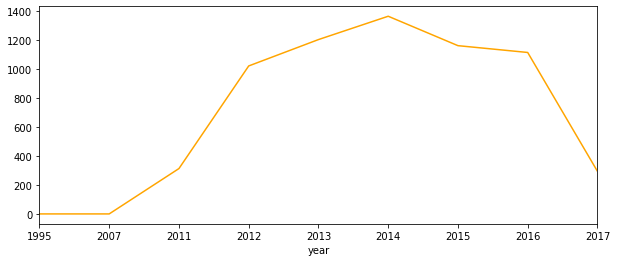

In [51]:
df.groupby('year')['month'].count().plot(figsize=(10,4),color='orange')

In [54]:
df2017 = pd.DataFrame(df.loc[df['year'] == '2017'])

In [55]:
df2017

,date,Employer,victims,Description,Fatality,inspection,month,year,zipcode,state,company
0,04/28/2017,"PROWLER RECOVERY, INC., 8100 W. Broward Blvd. PLANTATION FL 33324",Francisco Canjura,A worker died after being caught between two vehicles.,Fatality,1229035,04,2017,33324,FL,PROWLER RECOVERY
1,04/27/2017,"Lydick Hooks Roofing Company, 1741 S. 14th ABILENE TX 79602",Ismael Mendosa,Worker fatally injured in fall from roof.,Fatality,1227895,04,2017,79602,TX,Lydick Hooks Roofing Company
2,04/27/2017,"MHP Real Estate Services, 180 Maiden Lane NEW YORK NY 10038",Robert Maresca,A worker died after falling from a 6 foot ladder.,Fatality,1228425,04,2017,10038,NY,MHP Real Estate Services
3,04/27/2017,"Randolph & Randolph, LLC, Logging site - near Hoover Met HOOVER AL 35244",John Townsend,Worker struck and killed by log.,Fatality,1228413,04,2017,35244,AL,Randolph & Randolph
4,04/26/2017,"Brown's Tree Service & Landscaping LLC, 1830 Hamilton-Cleves Road HAMILTON OH 45011",John Kelly Neal,Worker died after being struck by a front end loader.,Fatality,1228040,04,2017,45011,OH,Brown's Tree Service & Landscaping LLC
5,04/26/2017,"McGee Roofing LLC, 1198 Circle Drive TONGANOXIE KS 66086",Domingo Lopez-Garcoa,Worker fatally injured in fall from roof.,Fatality,1227780,04,2017,66086,KS,McGee Roofing LLC
6,04/25/2017,"Coles Energy, 3619 E State Route 113 MILAN OH 44846",Thomas Layton,Worker fatally injured in fall when fuel truck exploded.,Fatality,1228280,04,2017,44846,OH,Coles Energy
7,04/25/2017,"DayStar Infrastructure & Constuction, Inc., 50 Maner Terrace SE SMYRNA GA 30080",Douglas Derrick/Norman Strozier,One worker died and another hospitalized after being ejected from bucket.,Fatality/Catastrophe,1227660,04,2017,30080,GA,DayStar Infrastructure & Constuction
8,04/25/2017,"EAM Harvesting, LLC, Section 6 Block 32 12101 Hwy 70 ARCADIA FL 34266",Jose De Jesus Ruiz-Guardado,Worker died after being electrocuted.,Fatality,1227909,04,2017,12101,FL,EAM Harvesting
9,04/25/2017,"Mastec Services Company, Inc., 803 SE 10th Street CAPE CORAL FL 33904",Timothy Ralph Mareno Jr.,Worker died after being electrocuted.,Fatality,1228038,04,2017,33904,FL,Mastec Services Company


In [56]:
df2016 = pd.DataFrame(df.loc[df['year'] == '2016'])

In [57]:
df2015 = pd.DataFrame(df.loc[df['year'] == '2015'])

In [58]:
df2014 = pd.DataFrame(df.loc[df['year'] == '2014'])

In [59]:
df2013 = pd.DataFrame(df.loc[df['year'] == '2013'])

In [60]:
df2012 = pd.DataFrame(df.loc[df['year'] == '2012'])

In [61]:
df2011 = pd.DataFrame(df.loc[df['year'] == '2011'])

In [64]:
df2017.groupby('month')['month'].count().sort_values(ascending=False)

month
01    90
04    89
03    75
02    41
Name: month, dtype: int64

In [62]:
df2016.groupby('month')['month'].count().sort_values(ascending=False)

month
06    111
09    108
08    105
10    103
04    97 
03    94 
05    93 
07    90 
02    85 
11    83 
12    74 
01    72 
Name: month, dtype: int64

In [63]:
df2015.groupby('month')['month'].count().sort_values(ascending=False)

month
07    123
06    121
08    119
09    108
01    99 
04    97 
10    90 
03    89 
11    88 
02    85 
05    76 
12    67 
Name: month, dtype: int64

In [65]:
df2014.groupby('month')['month'].count().sort_values(ascending=False)

month
07    140
06    128
09    127
10    126
08    124
11    123
04    110
01    110
05    103
03    100
12    90 
02    84 
Name: month, dtype: int64

In [66]:
df2013.groupby('month')['month'].count().sort_values(ascending=False)

month
08    134
05    128
07    127
04    127
09    119
10    117
11    113
12    93 
06    73 
01    62 
03    59 
02    52 
Name: month, dtype: int64

In [67]:
df2012.groupby('month')['month'].count().sort_values(ascending=False)

month
07    109
06    94 
09    93 
08    91 
01    90 
10    89 
05    87 
03    81 
04    80 
02    74 
11    71 
12    63 
Name: month, dtype: int64

In [70]:
df[df['Description'].str.contains("slip|slipped|slipping|sliping|sliped",na=False)]

,date,Employer,victims,Description,Fatality,inspection,month,year,zipcode,state,company
364,12/01/2016,"Cracker Barrel, 123 SW Loop 410 SAN ANTONIO TX 78245",NaN,Worker died after slipping on kitchen floor and striking head.,Fatality,1194816,12,2016,78245,TX,Cracker Barrel
512,10/13/2016,"Buchanan Pallet Products, Buchanan, MI 49107",James Borsodi,Worker died after slipping and falling.,Fatality,1187359,10,2016,49107,MI,Buchanan Pallet Products
1078,4/27/2016,"Per Osmund Syvertsen, Cary, NC 27519",Per Osmund Syvertsen,Worker unloading a carpet pad died after slipping and striking head.,Fatality,NaN,04,2016,27519,NC,Per Osmund Syvertsen
1291,2/18/2016,"Boz Electrical Contractors Inc, Whippany, NJ 07981",Robert J. Derkacs Jr.,Worker fatally crushed when generator slipped from crane sling.,Fatality,1127072,02,2016,07981,NJ,Boz Electrical Contractors Inc
1370,1/20/2016,"Ohio International Lumber, Waverly, OH 45690",Joseph Mills,Worker died after slipping on ice.,Fatality,1120071,01,2016,45690,OH,Ohio International Lumber
1428,12/20/2015,"The Fresh Market Inc., Jacksonville, FL 32223",Jerry Holt,Worker died after slipping and falling on floor of meat cooler.,Fatality,1113342,12,2015,32223,FL,The Fresh Market Inc.
1487,11/27/2015,"Menards, West St. Paul, MN 55118",Wilton R. Grieger,Worker suffered fatal head injury after slipping in parking lot.,Fatality,NaN,11,2015,55118,MN,Menards
1574,10/29/2015,"Triangle Distributing Co., Whittier, CA 90601",Pedro Gonzalez,Worker died after slipping and falling while unloading truck.,Fatality,1104455,10,2015,90601,CA,Triangle Distributing Co.
1642,10/5/2015,"Casaca Vineyards, Five Points, CA 93624",Alfonso Lopez,Worker changing tire fatally crushed when jack slipped.,Fatality,1096750,10,2015,93624,CA,Casaca Vineyards
1643,10/5/2015,"Casaca Vineyards, Five Points, CA 93624",Alfonso Lopez,Worker changing tire fatally crushed when jack slipped.,Fatality,1096750,10,2015,93624,CA,Casaca Vineyards


In [71]:
df[df['Description'].str.contains("fall|falling|fell",na=False)]

,date,Employer,victims,Description,Fatality,inspection,month,year,zipcode,state,company
1,04/27/2017,"Lydick Hooks Roofing Company, 1741 S. 14th ABILENE TX 79602",Ismael Mendosa,Worker fatally injured in fall from roof.,Fatality,1227895,04,2017,79602,TX,Lydick Hooks Roofing Company
2,04/27/2017,"MHP Real Estate Services, 180 Maiden Lane NEW YORK NY 10038",Robert Maresca,A worker died after falling from a 6 foot ladder.,Fatality,1228425,04,2017,10038,NY,MHP Real Estate Services
5,04/26/2017,"McGee Roofing LLC, 1198 Circle Drive TONGANOXIE KS 66086",Domingo Lopez-Garcoa,Worker fatally injured in fall from roof.,Fatality,1227780,04,2017,66086,KS,McGee Roofing LLC
6,04/25/2017,"Coles Energy, 3619 E State Route 113 MILAN OH 44846",Thomas Layton,Worker fatally injured in fall when fuel truck exploded.,Fatality,1228280,04,2017,44846,OH,Coles Energy
12,04/24/2017,"Sherwin Williams, 711 West Wabash EFFINGHAM IL 62401",Doyle Abbott,Worker died after falling from ladder.,Fatality,1234480,04,2017,62401,IL,Sherwin Williams
14,04/22/2017,"Ameren Missouri, Keokuk Energy Center KEOKUK IA 52632",Ron Summers,Worker drowned when cart fell into damn.,Fatality,1227386,04,2017,52632,IA,Ameren Missouri
15,04/22/2017,"Lakeside Industries, Port Ludlow, WA 98365",James Schneider,Worker died after falling on asphalt mixing conveyor and stairway.,Fatality,1227852,04,2017,98365,WA,Lakeside Industries
16,04/21/2017,"Martinek Grain & Bins, Inc., 3001 Bois D'Arc Street GREENVILLE TX 75401",Justin Ridings,Worker fatally injured in fall from top of grain silo.,Fatality,1227232,04,2017,75401,TX,Martinek Grain & Bins
23,04/19/2017,"Riveras Roofing, 2114-16 Greenfield Ave. MILWAUKEE WI 53204",Joel Negron-Rosario,Worker died in 20 foot fall to ground.,Fatality,1226019,04,2017,53204,WI,Riveras Roofing
25,04/18/2017,"Fedex Ground, 8411 Florida Mining Blvd. TAMPA FL 33634",Deykwon Bond-Thomas,Worker fatally injured after falling from a 2 foot high loading platform.,Fatality,1226018,04,2017,33634,FL,Fedex Ground


In [73]:
df[df['Description'].str.contains("\bheat|heat stroke|heat stress|\bhot",na=False)]

,date,Employer,victims,Description,Fatality,inspection,month,year,zipcode,state,company
708,8/17/2016,"Weathercraft Inc, Jefferson City, MO 65109",Darren Laird,Worker on roof died from heat stroke.,Fatality,1170970,08,2016,65109,MO,Weathercraft Inc
714,8/15/2016,"Dixie Erectors, Smyrna, GA 30080",Joshua Wade,Worker died from heat stroke while unloading steel.,Fatality,1169801,08,2016,30080,GA,Dixie Erectors
728,8/11/2016,"Briggs Traditional Turf Farms Inc, Kansas City, MO 64108",Don Arthur,Worker died from heat stroke while installing sod.,Fatality,1169509,08,2016,64108,MO,Briggs Traditional Turf Farms Inc
746,8/7/2016,"Hydrogreen LLC, Newcomerstown, OH 43832",Ryan Kamp,Employee died from heat stroke while installing erosion control blanket.,Fatality,1167945,08,2016,43832,OH,Hydrogreen LLC
768,8/2/2016,"Westlex Corp, Houston, TX 77079",Jose Mendoza,Worker prepping cars for paint died from heat stroke.,Fatality,1166998,08,2016,77079,TX,Westlex Corp
781,7/23/2016,"Wade T Blair Farm, Danville, VA 24541",Noe Espinoza Pulgarin,Worker died from heat stress/stroke.,Fatality,NaN,07,2016,24541,VA,Wade T Blair Farm
782,7/23/2016,"Wal Mart Distribution Center, Opelousas, LA 70570",NaN,Employee driving yard truck died from heat stroke.,Fatality,1164341,07,2016,70570,LA,Wal Mart Distribution Center
789,7/22/2016,"Townsend Tree Service, Poplar Bluff, MO 63901",Tyler Halsey,Worker performing tree trimming operations died from heat stroke.,Fatality,1164351,07,2016,63901,MO,Townsend Tree Service
796,7/20/2016,"Drum Equipment Inc, Liberty, TX 77575",Franklin Weaver,Worker operating weed eater died from heat stress.,Fatality,1163554,07,2016,77575,TX,Drum Equipment Inc
806,7/19/2016,"Performance Lawn Service Inc, Davie, FL 33317",William Padron,Employee cutting grass died from heat stress.,Fatality,1163119,07,2016,33317,FL,Performance Lawn Service Inc


In [77]:
df[df['Description'].str.contains("explode|explosion|exploded|\bfire|burn|burned|burning",na=False)]

,date,Employer,victims,Description,Fatality,inspection,month,year,zipcode,state,company
6,04/25/2017,"Coles Energy, 3619 E State Route 113 MILAN OH 44846",Thomas Layton,Worker fatally injured in fall when fuel truck exploded.,Fatality,1228280,04,2017,44846,OH,Coles Energy
29,04/18/2017,"U.S. Field Servicecs (USFS), LLC, Aethon Energy Production Site MANSFIELD LA 71052",Cameron Hernandez/Unknown,One worker died and another hospitalized in oil tak explosion.,Fatality/Catastrophe,1226670,04,2017,71052,LA,U.S. Field Servicecs (USFS)
31,04/17/2017,"Marshall Pottery, Inc., 4901 Elysian Fields Road MARSHALL TX 75672",Arturo Gonzalez,Worker died from burns suffered while performing maintenance on a limit switch.,Fatality,1226618,04,2017,75672,TX,Marshall Pottery
50,04/11/2017,"ORBITAL ATK INC., 25201 E. 78 Hwy INDEPENDENCE MO 64056",Unknown,Worker died after explosion at ammunition plant.,Fatality,1224114,04,2017,25201,MO,ORBITAL ATK INC.
83,04/03/2017,"LOY-LANGE BOX COMPANY, 222 RUSSELL BOULEVARD SAINT LOUIS MO 63104",Kenneth Trentham,Worker fatally injured when boiler exploded.,Fatality,1221846,04,2017,63104,MO,LOY-LANGE BOX COMPANY
87,04/01/2017,"Caliente Resorts, LLC, 21240 Gran Via Blvd LAND O LAKES FL 34639",Antonio Quiroga,Worker died from burns while repairing bread oven.,Fatality,1222498,04,2017,21240,FL,Caliente Resorts
153,03/06/2017,"Sentinel Energy Center LLC, Hot Springs, CA 92240",Daniel Collins,Worker fatally injured when high pressure valve exploded.,Fatality,NaN,03,2017,92240,CA,Sentinel Energy Center LLC
172,02/17/2017,"Speed Vegas, Las Vegas, NV 89054",Gil Ben-Kely,Worker killed in vehicle explosion.,Fatality,NaN,02,2017,89054,NV,Speed Vegas
181,02/09/2017,"Phillips 66 Pipeline, LLC, Williams Discovery Plant PARADIS LA 70080",Josh Helms,Worker died in pipeline explosion.,Fatality,NaN,02,2017,70080,LA,Phillips 66 Pipeline
184,02/08/2017,"Elite Industrial Services, 4200 Highway 190 West DERIDDER LA 70634",Jody Gooch/William Rolls/Sedrick Stallworth,Three workers died after pressurized tank exploded.,Fatality,1209683,02,2017,70634,LA,Elite Industrial Services


In [80]:
df[df['Description'].str.contains("\brain|\bice|snow|Lightening|flooding",na=False)]

,date,Employer,victims,Description,Fatality,inspection,month,year,zipcode,state,company
386,11/25/2016,"Kirk Almendinger Contracting, Roseville, MN 55113",Kirk Almendinger,Worker struck and killed by front end loader while plowing snow.,Fatality,1194523,11,2016,55113,MN,Kirk Almendinger Contracting
391,11/22/2016,"Nashoba Hill Corp., 79 Powers Road WESTFORD MA 01886",David McPhee,Worker struck and killed by snow grooming machine.,Fatality,1193014,11,2016,01886,MA,Nashoba Hill Corp.
2414,2/22/2015,"Sean Corrigan Construction, Canton, MA 02021",NaN,Worker on snow-covered roof killed in fall through skylight.,Fatality,1042748,02,2015,02021,MA,Sean Corrigan Construction
2684,11/24/2014,"K & L Lawn Care, Troy, NH 03465",NaN,Company owner fatally crushed under front end loader during snow removal preparations.,Fatality,NaN,11,2014,03465,NH,K & L Lawn Care
3749,2/28/2014,"Fritchas, New Haven, IN 46774",NaN,Worker crushed by dump truck during snow removal.,Fatality,NaN,02,2014,46774,IN,Fritchas
3817,2/5/2014,"Advocate Good Shepherd Hospital, Barrington, IL 60010",NaN,Worker struck and killed by snow plow.,Fatality,NaN,02,2014,60010,IL,Advocate Good Shepherd Hospital
3835,1/30/2014,"Mayville Engineering, Beaver Dam, WI 53916",NaN,Worker killed in vehicle collision during a snow storm.,Fatality,NaN,01,2014,53916,WI,Mayville Engineering
3875,1/20/2014,"Kel-Log Inc., Errol, NH 03579",NaN,Worker struck and killed by semi-truck while installing snow chains on tires of company vehicle.,Fatality,NaN,01,2014,03579,NH,Kel-Log Inc.
4350,9/9/2013,"GFW Welding & Co., Derby, CT 06418",NaN,Worker crushed by a snow plow blade that slid off forklift blades.,Fatality,NaN,09,2013,06418,CT,GFW Welding & Co.
5903,3/13/2012,"Alaska Heliskiing LLC, Hanes, AK 998273",NaN,Worker at a snow ski resort was buried under nearly eight feet of snow after an avalanche.,NaN,NaN,03,2012,99827,AK,Alaska Heliskiing LLC
